In [1]:
from nltk.tokenize import word_tokenize

In [2]:
from jlam.py_sql import PySql

In [3]:
import jlam.conn_constants as cnst

In [ ]:
cnst.

In [ ]:
sfdc = PySql(cnst.SVR_BIODS,cnst.DB_SFDC_DATA)

In [ ]:
from nltk.corpus import stopwords

In [122]:
sw = set(stopwords.words('english'))

In [123]:
sql = ''' select top 1000 case_type__c,subject from dbo.[case]
    where incident_Region__c = 'North America'
    and case_type__c = 'User Experience - Access & Profile'
    and subject is not null
'''

In [124]:
df = sfdc.fetchDF(sql)

In [130]:
def tokenized_series(ser):
    '''
    return tokenized words from a dataframe series
    example: tokenized_series(df['subject'])
    '''
    lst_of_sentences = ser.values.tolist()
    lst_of_words = []
    for x in lst_of_sentences:
        lst_of_words.append(word_tokenize(x))
    return lst_of_words
                            
        
        

In [133]:
lst_of_words=tokenized_series(df['subject'])

In [150]:
def list_of_words_to_doc(lst_of_words):
    '''
        converting list of words to a document
    '''
    text = ''
    for lst in lst_of_words:
        for word in lst:
            text += word + " "
    return text

In [151]:
text=list_of_words_to_doc(lst_of_words)

In [152]:
text

u"Password Reset Link How can I administer for Gerardo Carrasco ? The \u201c & \u201d is not able to be used in the Password CGE PW reset REQUEST FOR SIGNATURE PIN RESET . Password Reset Link first time log in User ID Why do I have to reset my password every time I try to access Concur ? Profile Transfer - Jayme Lavoie Password reset - Timothy Ohara Password reset link pw reset Site Not Loading Correctly Unable to sign into CGE . ID and password help Account Activation - password reset link Bank account information . Forgotten Signature Pin Password reset Password reset Need to add Frequent-Traveler Programs to Concur Reset Signature User called for a password reset Signature Pin Reset Signature Pin Reset Password Reset Password Reset Signature PIN Reset - Darby Magruder Password Reset Reset Signature Pin Reset Signature Pin and Unlocking a Document Password Reset Signature PIN Reset - Lauren Attermeier USCIS Employee Moved to CBP , Needs Profile Created in CBP access in concur Non-Aut

In [ ]:
genesis=nltk.corpus.genesis.words('english-web.txt')

In [ ]:
genesis

In [132]:
from nltk.collocations import BigramCollocationFinder

In [157]:

bcf = BigramCollocationFinder.from_words(text)

In [158]:
bcf.nbest(BigramAssocMeasures.likelihood_ratio,4)

[(u'i', u'n'), (u'w', u'o'), (u'q', u'u'), (u' ', u'P')]

In [161]:
from nltk.metrics import BigramAssocMeasures
filter_stops = lambda w: len(w) <5
bcf.apply_word_filter(filter_stops)
bcf.nbest

[]

In [41]:
df[:1]['subject']

0    needs password reset
Name: subject, dtype: object

In [79]:
lst = df['subject'].values.tolist()

In [43]:
for x in lst:
    print word_tokenize(x)

[u'needs', u'password', u'reset']
[u'needs', u'password', u'reset']
[u'Case', u'#', u'06510356']
[u'feed', u'amex', u'receipts', u'into', u'Concur']
[u'WN-WNDC-WN', u'Booking', u'Error', u'but', u'Booked', u'with', u'Airline']
[u'Profile', u'-', u'Traveler', u'Name', u'Issue']
[u'Has', u'a', u'question', u'on', u'traveler', u'Mark', u'Qualter']
[u'Expense', u'Report', u'for', u'Fae', u'Druiz']
[u'Adding', u'personal', u'credit', u'card']
[u'Beacon', u'Roofing/Stacy', u'Cotton/admin', u'booking', u'for', u'Sylvie', u'Santoro', u'but', u'trip', u'did', u'not', u'appear', u'in', u'either', u'trip', u'library']


In [44]:
def convert_to_list(df,columnName):
    ''' convert a column in dataframe to list'''
    return df[columnName].values.tolist()

In [45]:
lst2=convert_to_list(df,'case_type__c')

In [46]:
lst2

[u'User Experience - Access & Profile',
 u'User Experience - Access & Profile',
 u'User Experience - Expense',
 u'Administration - Expense',
 u'User Experience - Travel',
 u'User Experience - Travel',
 u'User Experience - Authorization',
 u'Administration - Expense',
 u'User Experience - Expense',
 u'User Experience - Travel']

In [47]:
def filter_stop_words(tokenized,stopwords):
    ''' remove stopwords from tokenized'''
    return [x for x in tokenized if x not in stopwords]

In [48]:
lst

[u'needs password reset',
 u'needs password reset',
 u'Case #06510356',
 u'feed amex receipts into Concur',
 u'WN-WNDC-WN Booking Error but Booked with Airline',
 u'Profile - Traveler Name Issue',
 u'Has a question on traveler Mark Qualter',
 u'Expense Report for Fae Druiz',
 u'Adding personal credit card',
 u'Beacon Roofing/Stacy Cotton/admin booking for Sylvie Santoro but trip did not appear in either trip library']

In [49]:
for x in lst:
    tokenized = word_tokenize(x)
    filtered_words = filter_stop_words(tokenized,sw)
    print filtered_words

[u'needs', u'password', u'reset']
[u'needs', u'password', u'reset']
[u'Case', u'#', u'06510356']
[u'feed', u'amex', u'receipts', u'Concur']
[u'WN-WNDC-WN', u'Booking', u'Error', u'Booked', u'Airline']
[u'Profile', u'-', u'Traveler', u'Name', u'Issue']
[u'Has', u'question', u'traveler', u'Mark', u'Qualter']
[u'Expense', u'Report', u'Fae', u'Druiz']
[u'Adding', u'personal', u'credit', u'card']
[u'Beacon', u'Roofing/Stacy', u'Cotton/admin', u'booking', u'Sylvie', u'Santoro', u'trip', u'appear', u'either', u'trip', u'library']


In [50]:
import nltk

In [54]:
def process_words(listOfWords,filterStopWords=True):
    tagged_list = []
    for w in listOfWords:
        tokenized = word_tokenize(w)
        if filterStopWords:
            filtered_words = filter_stop_words(tokenized,sw)
            tagged_words = nltk.pos_tag(filtered_words)
        else:
            tagged_words = nltk.pos_tag(tokenized)
        tagged_list.append(tagged_words)
    return tagged_list

In [80]:
tagged = process_words(lst,False)

In [81]:
tagged

[[(u'I', 'PRP'), (u'needs', 'VBP'), (u'password', 'JJ'), (u'reset', 'NN')],
 [(u'I', 'PRP'), (u'needs', 'VBP'), (u'password', 'JJ'), (u'reset', 'NN')],
 [(u'I', 'PRP'), (u'Case', 'NNP'), (u'#', '#'), (u'06510356', 'CD')],
 [(u'I', 'PRP'),
  (u'feed', 'VBP'),
  (u'amex', 'JJ'),
  (u'receipts', 'NNS'),
  (u'into', 'IN'),
  (u'Concur', 'NNP')],
 [(u'I', 'PRP'),
  (u'WN-WNDC-WN', 'VBP'),
  (u'Booking', 'VBG'),
  (u'Error', 'NNP'),
  (u'but', 'CC'),
  (u'Booked', 'NNP'),
  (u'with', 'IN'),
  (u'Airline', 'NNP')],
 [(u'I', 'PRP'),
  (u'Profile', 'NNP'),
  (u'-', ':'),
  (u'Traveler', 'NN'),
  (u'Name', 'NNP'),
  (u'Issue', 'NNP')],
 [(u'I', 'PRP'),
  (u'Has', 'VBP'),
  (u'a', 'DT'),
  (u'question', 'NN'),
  (u'on', 'IN'),
  (u'traveler', 'NN'),
  (u'Mark', 'NNP'),
  (u'Qualter', 'NNP')],
 [(u'I', 'PRP'),
  (u'Expense', 'VBP'),
  (u'Report', 'NNP'),
  (u'for', 'IN'),
  (u'Fae', 'NNP'),
  (u'Druiz', 'NNP')],
 [(u'I', 'PRP'),
  (u'Adding', 'VBP'),
  (u'personal', 'JJ'),
  (u'credit', 'NN'),
  (

In [61]:
s = ['I need to reset my password']

In [62]:
process_words(s)

[[('I', 'PRP'), ('need', 'VBP'), ('reset', 'VB'), ('password', 'NN')]]

In [66]:
s2 = ['she needs password reset']
process_words(s2,False)

[[('she', 'PRP'), ('needs', 'VBZ'), ('password', 'JJ'), ('reset', 'NN')]]

In [67]:
process_words(s2)

[[('needs', 'NNS'), ('password', 'NN'), ('reset', 'NN')]]

In [72]:
s3 = ['I need password to be reset']

In [73]:
process_words(s3,False)

[[('I', 'PRP'),
  ('need', 'VBP'),
  ('password', 'NN'),
  ('to', 'TO'),
  ('be', 'VB'),
  ('reset', 'VB')]]

In [74]:
s = ['I need to reset my password']
process_words(s,False)

[[('I', 'PRP'),
  ('need', 'VBP'),
  ('to', 'TO'),
  ('reset', 'VB'),
  ('my', 'PRP$'),
  ('password', 'NN')]]

In [75]:
len(tagged)

10

In [76]:
tagged[0]

[(u'needs', 'NNS'), (u'password', 'NN'), (u'reset', 'NN')]

In [99]:
qry_case_type='''
select top 25 case_type__c,count(*) cnt
--,subject 
	from dbo.[case]
    where incident_Region__c = 'North America'
    and subject is not null
    group by case_type__c
    order by cnt desc
'''

In [100]:
df_case_type=sfdc.fetchDF(qry_case_type)

In [85]:
import matplotlib.pyplot as plt

In [87]:
%matplotlib inline

In [116]:
df_case_type.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
case_type__c    24 non-null object
cnt             25 non-null int64
dtypes: int64(1), object(1)
memory usage: 472.0+ bytes


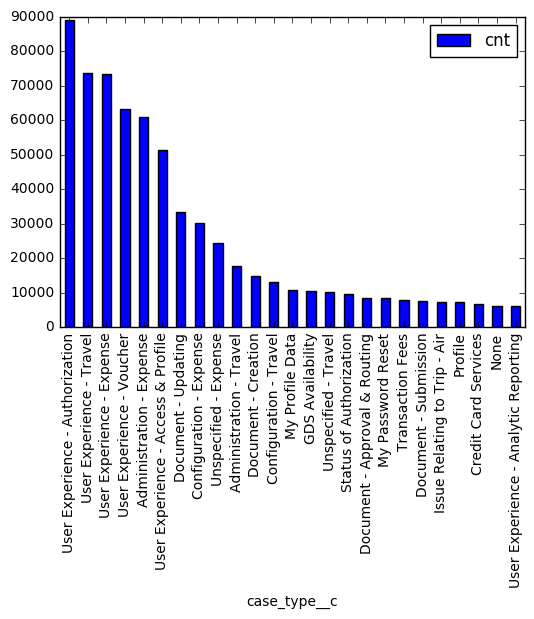

In [101]:
df_case_type.plot.bar(x='case_type__c')

In [109]:
s3=u'''
select top 25 case_type__c
	,  cast(100. * count(*) / (select count(*) from dbo.[case] where incident_Region__c = 'North America') as numeric(5,2))as pct
--,subject 
	from dbo.[case]
    where incident_Region__c = 'North America'
    and subject is not null
    group by case_type__c
    order by pct desc
'''

In [110]:
df3=sfdc.fetchDF(s3)

In [115]:
df3.plot.bar(x='case_type__c')

TypeError: Empty 'DataFrame': no numeric data to plot

In [105]:
qry_auth = '''select top 100 subject from dbo.[case]
    where incident_Region__c = 'North America'
    and case_type__c = 'User Experience - Authorization'
    '''

In [106]:
df_auth_subject = sfdc.fetchDF(qry_auth)

In [107]:
df_auth_subject

,subject
0,Has a question on traveler Mark Qualter
1,Why did document continue routing after reserv...
2,Cancelling an Authorization
3,Cancelling an Approved Authorization
4,Use a different authorization
5,Incorrect Cost Comparison
6,Adjusting Payment method for travel fees
7,Moving Organizations
8,FAILED INTERFACE error received and authorizat...
9,Travel authorization for Karen Sliter stuck in...


In [ ]:
cnst.